# 1. Generiranje linearno nerazdvojivih podataka

C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


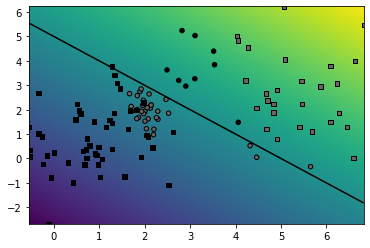

In [1]:
import numpy as np
import data
import matplotlib.pyplot as plt

np.random.seed(100)
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores    
    
# get data
X,Y_ = data.sample_gmm_2d(4, 2, 30)
# X,Y_ = data.sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X)>0.5  

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, rect, offset=0)
  
# graph the data points
data.graph_data(X, Y_, Y, special=[])

plt.show()


# 2. Višeslojna klasifikacija u Pythonu (20% bodova)

Oblikujte i izvedite modul fcann2 za rad s probabilističkim klasifikacijskim modelom s jednim skrivenim slojem prema uputama iz odjeljka 0a. Neka organizacija vašeg koda bude sukladna organizaciji modula logreg iz prethodne vježbe. Napišite metode fcann2_train, fcann2_classify. Isprobajte njihov rad na umjetnom skupu 2D podataka dvaju razreda dobivenih iz Gaussove mješavine od 6 komponenata.

Ovisno o parametrima i stanju generatora slučajnih brojeva, vaš rezultat mogao bi izgledati kao na sljedećoj slici. Naši parametri bili su: K=6, C=2, N=10, param_niter=1e5, param_delta=0.05, param_lambda=1e-3 (koeficijent regularizacije), dimenzija skrivenog sloja: 5.

In [2]:
import fcann2

Iter:  0 loss: 1.0026344135516314
Iter:  100 loss: 0.6578618553647684
Iter:  200 loss: 0.6605537725398974
Iter:  300 loss: 0.6583985054239035
Iter:  400 loss: 0.6558380817682379
Iter:  500 loss: 0.6544335904161459
Iter:  600 loss: 0.649600789520964
Iter:  700 loss: 0.6584796856335889
Iter:  800 loss: 0.6452061243219024
Iter:  900 loss: 0.6369321498994976
Iter:  1000 loss: 0.6300960701158547
Iter:  1100 loss: 0.6241180648129878
Iter:  1200 loss: 0.6160689049853653
Iter:  1300 loss: 0.6214367867747294
Iter:  1400 loss: 0.6215063607014873
Iter:  1500 loss: 0.6126842795830914
Iter:  1600 loss: 0.5605525506081881
Iter:  1700 loss: 0.5374010844210313
Iter:  1800 loss: 0.5405184125997377
Iter:  1900 loss: 0.5423503331362908
Iter:  2000 loss: 0.5345676016046073
Iter:  2100 loss: 0.5433102538037062
Iter:  2200 loss: 0.5323235350267511
Iter:  2300 loss: 0.5282921223146679
Iter:  2400 loss: 0.522100274814494
Iter:  2500 loss: 0.5233755414677351
Iter:  2600 loss: 0.5219046262635076
Iter:  2700 los

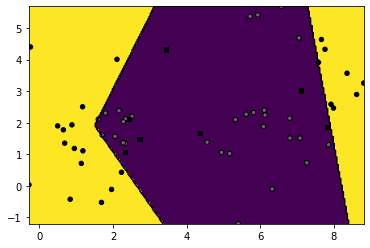

In [3]:
np.random.seed(100)
X, Y_ = data.sample_gmm_2d(6, 2, 10)
model = fcann2.FCANN2(2, 5, 2)

model.train(X,Y_, 10000, 0.1)

probs = model.forward(X)
Y = np.argmax(probs, axis=1)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
print("Accuracy: ", accuracy, "Precision: ", precision, "Recall: ", recall)

# iscrtaj rezultate, decizijsku plohu
rect= (np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(lambda X: model.classify(X), rect)
data.graph_data(X, Y_, np.argmax(probs, axis=1))
plt.show()

# 3. Linearna regresija u PyTorchu (10% bodova)

Jednostavan primjer implementacije algoritma strojnog učenja u PyTorchu prikazat ćemo na potpunom primjeru optimizacijskog postupka za određivanje parametara pravca y = a * x + b koji prolazi kroz točke (1,3) i (2,5).

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a*X + b

    diff = (Y-Y_)

    # kvadratni gubitak
    loss = torch.sum(diff**2)

    # računanje gradijenata
    loss.backward()

    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

    if i % 10 == 0:
        print(f'step: {i}, loss:{loss}, Y_:{Y_}, a:{a}, b:{b}')

step: 0, loss:64.5579605102539, Y_:tensor([-1.5597, -1.6157], grad_fn=<AddBackward0>), a:tensor([3.5023], requires_grad=True), b:tensor([0.7313], requires_grad=True)
step: 10, loss:0.08878996968269348, Y_:tensor([2.7463, 5.1563], grad_fn=<AddBackward0>), a:tensor([2.3982], requires_grad=True), b:tensor([0.3558], requires_grad=True)
step: 20, loss:0.04910660162568092, Y_:tensor([2.8115, 5.1165], grad_fn=<AddBackward0>), a:tensor([2.2961], requires_grad=True), b:tensor([0.5209], requires_grad=True)
step: 30, loss:0.027159303426742554, Y_:tensor([2.8598, 5.0866], grad_fn=<AddBackward0>), a:tensor([2.2202], requires_grad=True), b:tensor([0.6437], requires_grad=True)
step: 40, loss:0.015020931139588356, Y_:tensor([2.8957, 5.0644], grad_fn=<AddBackward0>), a:tensor([2.1638], requires_grad=True), b:tensor([0.7350], requires_grad=True)
step: 50, loss:0.008307605981826782, Y_:tensor([2.9225, 5.0479], grad_fn=<AddBackward0>), a:tensor([2.1218], requires_grad=True), b:tensor([0.8029], requires_gr

Ponovite osnove PyTorcha navedene u odjeljcima 0b i 0c. Analizirajte prikazani program te provjerite ispravnost izvođenja.

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

Ispišite vrijednosti gradijenata tijekom napredovanja postupka.

Odredite analitičke izraze za gradijente funkcije gubitka po parametrima a i b. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a * X + b

    diff = (Y-Y_)

    # srednji kvadratni gubitak - osiguran rad neovisno o broju ulaznih tocaka
    loss = torch.mean(diff**2) 

    # računanje gradijenata
    loss.backward()

    real_grad_a = 2 * torch.mean(-diff * X) 
    real_grad_b = 2 * torch.mean(-diff)
    if i % 10 == 0: 
        print(f'step: {i:2d}, loss: {loss:.6f}, PyTorch gradijent: a={a.grad.detach().numpy()[0]:.03f} b={b.grad.detach().numpy()[0]:.03f}, Analitički izračunan gradijent: a={real_grad_a:.03f} b={real_grad_b:.03f}')
    
    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

step:  0, loss: 28.136366, PyTorch gradijent: a=-16.648 b=-10.399, Analitički izračunan gradijent: a=-16.648 b=-10.399
step: 10, loss: 0.022530, PyTorch gradijent: a=0.042 b=-0.069, Analitički izračunan gradijent: a=0.042 b=-0.069
step: 20, loss: 0.016792, PyTorch gradijent: a=0.037 b=-0.060, Analitički izračunan gradijent: a=0.037 b=-0.060
step: 30, loss: 0.012515, PyTorch gradijent: a=0.032 b=-0.051, Analitički izračunan gradijent: a=0.032 b=-0.051
step: 40, loss: 0.009328, PyTorch gradijent: a=0.027 b=-0.044, Analitički izračunan gradijent: a=0.027 b=-0.044
step: 50, loss: 0.006952, PyTorch gradijent: a=0.024 b=-0.038, Analitički izračunan gradijent: a=0.024 b=-0.038
step: 60, loss: 0.005182, PyTorch gradijent: a=0.020 b=-0.033, Analitički izračunan gradijent: a=0.020 b=-0.033
step: 70, loss: 0.003862, PyTorch gradijent: a=0.018 b=-0.029, Analitički izračunan gradijent: a=0.018 b=-0.029
step: 80, loss: 0.002878, PyTorch gradijent: a=0.015 b=-0.025, Analitički izračunan gradijent: a=

# 4. Logistička regresija u PyTorchu (20% bodova)

Dopunite izvedbu razreda PTLogreg. Provjerite postiže li vaš program iste rezultate kao i odgovarajući program iz nulte vježbe za slučajeve dva i tri razreda podataka. Pripazite na to da gubitak karakterizirate tako da ne ovisi o broju podataka za učenje (tako je lakše interpretirati iznos gubitka te validirati korak učenja).

Dodajte regularizaciju na način da gubitak formulirate kao zbroj unakrsne entropije i L2 norme vektorizirane matrice težina pomnožene hiperparametrom param_lambda. Ispitajte utjecaj regularizacije na oblik decizijske plohe.

Eksperimentirajte s različitim vrijednostima hiperparametara. Pronađite kombinacije hiperparametara za koje vaš program ne uspijeva pronaći zadovoljavajuće rješenje i pokušajte objasniti što se događa.

In [6]:
import pt_logreg

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

X = torch.from_numpy(X)
Yoh_ = torch.from_numpy(Yoh_)

# λ = 0.0

In [7]:
param_lambda=0.0

iter: 0 loss: 5.685210
iter: 100 loss: 0.577426
iter: 200 loss: 0.517018
iter: 300 loss: 0.491021
iter: 400 loss: 0.477451
iter: 500 loss: 0.469340
iter: 600 loss: 0.464006
iter: 700 loss: 0.460242
iter: 800 loss: 0.457439
iter: 900 loss: 0.455262
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


C:\Users\Filip\git\DU\lab1\pt_logreg.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64)
C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


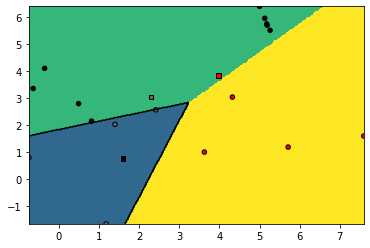

In [8]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
Y = ptlr.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

# λ = 0.0001

In [9]:
param_lambda=0.0001

iter: 0 loss: 0.453807
iter: 100 loss: 0.452378
iter: 200 loss: 0.451176
iter: 300 loss: 0.450150
iter: 400 loss: 0.449262
iter: 500 loss: 0.448486
iter: 600 loss: 0.447802
iter: 700 loss: 0.447195
iter: 800 loss: 0.446652
iter: 900 loss: 0.446166
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


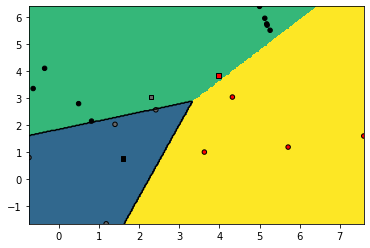

In [10]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 0.01 

In [11]:
param_lambda=0.01

iter: 0 loss: 0.477839
iter: 100 loss: 0.477209
iter: 200 loss: 0.476796
iter: 300 loss: 0.476454
iter: 400 loss: 0.476154
iter: 500 loss: 0.475884
iter: 600 loss: 0.475639
iter: 700 loss: 0.475414
iter: 800 loss: 0.475207
iter: 900 loss: 0.475016
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


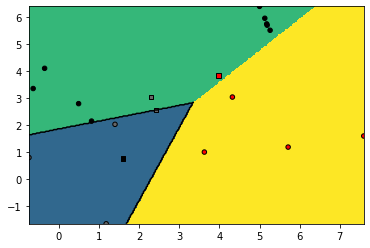

In [12]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 0.1 

In [13]:
param_lambda=0.1

iter: 0 loss: 0.747828
iter: 100 loss: 0.699787
iter: 200 loss: 0.677985
iter: 300 loss: 0.665985
iter: 400 loss: 0.658650
iter: 500 loss: 0.653772
iter: 600 loss: 0.650333
iter: 700 loss: 0.647845
iter: 800 loss: 0.646042
iter: 900 loss: 0.644752
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


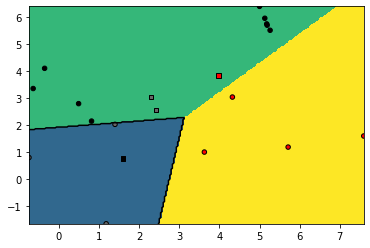

In [14]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 1.0

In [15]:
param_lambda=1.0

iter: 0 loss: 1.926248
iter: 100 loss: 1.100624
iter: 200 loss: 1.047815
iter: 300 loss: 1.040498
iter: 400 loss: 1.056563
iter: 500 loss: 1.056169
iter: 600 loss: 1.056133
iter: 700 loss: 1.056130
iter: 800 loss: 1.056129
iter: 900 loss: 1.056129
Accuracy:  0.55
Precision & recall for class 0 :  (0.0, nan)
Precision & recall for class 1 :  (1.0, 0.5263157894736842)
Precision & recall for class 2 :  (0.2, 1.0)


C:\Users\Filip\git\DU\lab1\data.py:132: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_i = tp_i / (tp_i + fp_i)
C:\Users\Filip\git\DU\lab1\data.py:73: UserWarning: No contour levels were found within the data range.
  plt.contour(xx0, xx1, values, colors='black', levels=[offset])


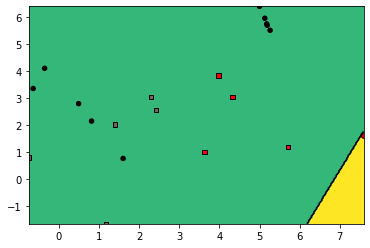

In [16]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# 5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)

Izvedite razred PTDeep te isprobajte konfiguraciju [2, 3] na istim podatcima kao i u prethodnom zadatku (ispitni program će vam biti vrlo sličan). Provjerite da su rezultati isti kao i ranije.

iter:  0  loss:  4.306194478641788
iter:  100  loss:  0.5653184223397942
iter:  200  loss:  0.5120885790774918
iter:  300  loss:  0.48852359854086447
iter:  400  loss:  0.4759674339284054
iter:  500  loss:  0.46835897612685146
iter:  600  loss:  0.4633071008965759
iter:  700  loss:  0.4597162790481152
iter:  800  loss:  0.4570269564247489
iter:  900  loss:  0.45492910198601355
Training finished. Elapsed time:  0.647587776184082  seconds. Final loss:  0.45325486639190005
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


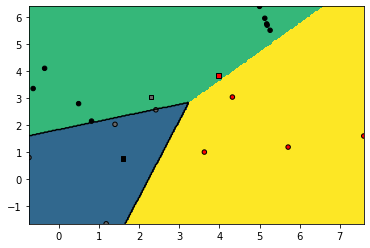

In [17]:
import pt_deep

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
parameter_list = [2, 3]
ptd = pt_deep.PTDeep(parameter_list)

X = torch.from_numpy(X)

ptd.train(X, Y_, 1000, 0.1)

# dohvati vjerojatnosti na skupu za učenje
probs = ptd.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

Rezultat pokretanja modela PTDeep s konfiguracijom [2,3] jednak je kao i kod implementacije logističke regresije u zadatku 4.

Napišite metodu count_params koja će ispisati simboličko ime i dimenzije tenzora svih parametara. Dodatno, neka funkcija računa i ukupan broj parametara modela (npr. za konfiguraciju [2, 3] rezultat bi trebao biti 9). Za obilazak svih parametara modela sada elegantno možemo koristiti iterator named_parameters.

In [18]:
print(ptd.count_parameters())

9


Isprobajte vaš kod na podatcima dobivenim pozivima data.sample_gmm_2d(4, 2, 40) i data.sample_gmm_2d(6, 2, 10), za konfiguracije [2, 2], [2, 10, 2] i [2, 10, 10, 2]. Ispišite točnost, odziv, preciznost i prosječnu preciznost te grafički prikažite rezultate klasifikacije i izgled decizijske plohe. Ako ne dođe do konvergencije, obratite pažnju na vrijednosti hiperparametara.

## Dataset: (4,2,40)

In [19]:
import pt_deep

# aktivacijska funkcija -> relu (zglobnica)
def activation(X):
    return torch.relu(X)

np.random.seed(100)

X,Y_ = data.sample_gmm_2d(4, 2, 40)
X = torch.from_numpy(X)

## Konfiguracija: [2, 2]

iter:  0  loss:  3.266965093575533
iter:  100  loss:  0.45508969781836106
iter:  200  loss:  0.44493707946697847
iter:  300  loss:  0.4424341071125703
iter:  400  loss:  0.4416387569399312
iter:  500  loss:  0.44136410876047755
iter:  600  loss:  0.4412648357892883
iter:  700  loss:  0.44122799133194796
iter:  800  loss:  0.4412140996714973
iter:  900  loss:  0.44120881182593075
Training finished. Elapsed time:  0.5234746932983398  seconds. Final loss:  0.4412067993708087
Accuracy:  0.675
Precision & recall for class 0 :  (0.5875, 0.7121212121212122)
Precision & recall for class 1 :  (0.7625, 0.648936170212766)


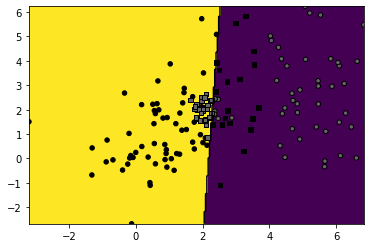

In [20]:
parameter_list = [2,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 2]

iter:  0  loss:  8.181044883547909
iter:  100  loss:  0.37105729843995405
iter:  200  loss:  0.3497552623477368
iter:  300  loss:  0.3231043952729038
iter:  400  loss:  0.31291410412265197
iter:  500  loss:  0.3060373139908521
iter:  600  loss:  0.30045075958377865
iter:  700  loss:  0.2963926999625914
iter:  800  loss:  0.2936324760275323
iter:  900  loss:  0.2917444619267888
Training finished. Elapsed time:  0.6605992317199707  seconds. Final loss:  0.29030971580701515
Accuracy:  0.89375
Precision & recall for class 0 :  (0.975, 0.8387096774193549)
Precision & recall for class 1 :  (0.8125, 0.9701492537313433)


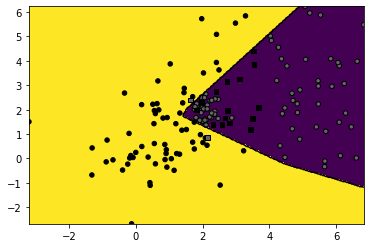

In [21]:
parameter_list = [2,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 10, 2]

iter:  0  loss:  5.258114672951421
iter:  100  loss:  0.35177918105979544
iter:  200  loss:  0.3136419349103998
iter:  300  loss:  0.2862151660208449
iter:  400  loss:  0.27691279811831365
iter:  500  loss:  0.2678046862553883
iter:  600  loss:  0.26032264992090326
iter:  700  loss:  0.2578365007249754
iter:  800  loss:  0.25109898070151576
iter:  900  loss:  0.24983479640585882
Training finished. Elapsed time:  0.667604923248291  seconds. Final loss:  0.2565637193866422
Accuracy:  0.9
Precision & recall for class 0 :  (0.9, 0.9)
Precision & recall for class 1 :  (0.9, 0.9)


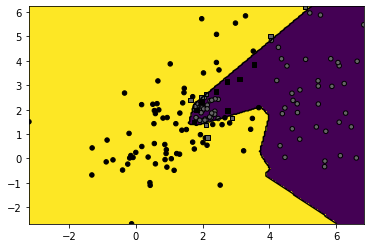

In [22]:
parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Dataset: (6,2,10)

In [23]:
np.random.seed(100)
X,Y_ = data.sample_gmm_2d(6, 2, 10)
X = torch.from_numpy(X)

## Konfiguracija: [2, 2]

iter:  0  loss:  1.4538634722190351
iter:  100  loss:  0.6685666701050063
iter:  200  loss:  0.6682090618558234
iter:  300  loss:  0.6681688321000995
iter:  400  loss:  0.6681642770882253
iter:  500  loss:  0.6681637601465175
iter:  600  loss:  0.6681637014325617
iter:  700  loss:  0.6681636947620502
iter:  800  loss:  0.6681636940041414
iter:  900  loss:  0.6681636939180248
Training finished. Elapsed time:  0.4383976459503174  seconds. Final loss:  0.6681636939082672
Accuracy:  0.6
Precision & recall for class 0 :  (0.5666666666666667, 0.6071428571428571)
Precision & recall for class 1 :  (0.6333333333333333, 0.59375)


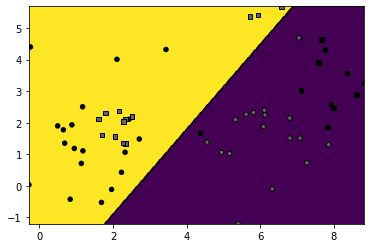

In [24]:
parameter_list = [2,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 2]

iter:  0  loss:  2.4640459292306724
iter:  100  loss:  0.5763887645409804
iter:  200  loss:  0.5340844133479046
iter:  300  loss:  0.4946973035796813
iter:  400  loss:  0.47654234339453994
iter:  500  loss:  0.464940236775347
iter:  600  loss:  0.45649276427356905
iter:  700  loss:  0.44999751582750386
iter:  800  loss:  0.4452975331804769
iter:  900  loss:  0.44190509501233016
Training finished. Elapsed time:  0.5144660472869873  seconds. Final loss:  0.43937886927540437
Accuracy:  0.75
Precision & recall for class 0 :  (0.7333333333333333, 0.7586206896551724)
Precision & recall for class 1 :  (0.7666666666666667, 0.7419354838709677)


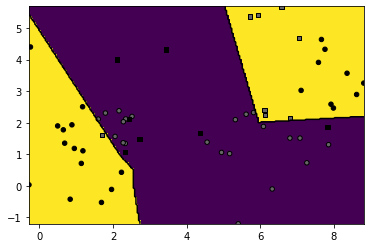

In [25]:
parameter_list = [2,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 10, 2]

iter:  0  loss:  5.728343163636362
iter:  100  loss:  0.4894514396702321
iter:  200  loss:  0.47025349236314123
iter:  300  loss:  0.44791420467325327
iter:  400  loss:  0.4268495368237088
iter:  500  loss:  0.47777954374222203
iter:  600  loss:  0.36997574354304524
iter:  700  loss:  0.41539186572973047
iter:  800  loss:  0.39107579691065103
iter:  900  loss:  0.3556852353584343
Training finished. Elapsed time:  0.6415824890136719  seconds. Final loss:  0.356458456198175
Accuracy:  0.8333333333333334
Precision & recall for class 0 :  (0.9, 0.7941176470588235)
Precision & recall for class 1 :  (0.7666666666666667, 0.8846153846153846)


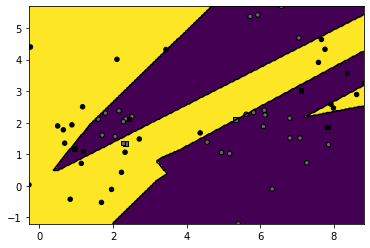

In [26]:
parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

Usporedite rezultate s onim što se zbiva kad za prijenosnu funkciju postavite sigmoidu. Sigmoida bi za ovakve male probleme zbog neprekidnosti trebala postići bolje rezultate od zglobnice. Glavna prednost zglobnice je u tome što nema zasićenje pa kod dubljih modela gradijenti teže nestaju.

iter:  0  loss:  0.7222247734669667
iter:  100  loss:  0.6361422554430325
iter:  200  loss:  0.6054721782358246
iter:  300  loss:  0.5856405196296285
iter:  400  loss:  0.5693377724047919
iter:  500  loss:  0.5537215467801693
iter:  600  loss:  0.5379963098765349
iter:  700  loss:  0.5222197525813497
iter:  800  loss:  0.50665157203909
iter:  900  loss:  0.4914547267815172
Training finished. Elapsed time:  0.6242821216583252  seconds. Final loss:  0.47676886871206725
Accuracy:  0.8166666666666667
Precision & recall for class 0 :  (0.9333333333333333, 0.7567567567567568)
Precision & recall for class 1 :  (0.7, 0.9130434782608695)


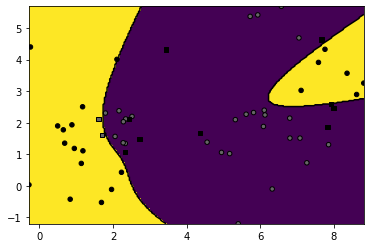

In [27]:
# aktivacijska funkcija -> sigmoida
def activation(X):
    return torch.sigmoid(X)

parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

# 6. Usporedba s jezgrenim SVM-om (10% bodova)

Isprobajte vaš razred na podacima dvaju razreda uzorkovanih iz mješavina Gaussovih distribucija. Kao i obično, ispišite pokazatelje performanse (točnost, odziv, preciznost, prosječnu preciznost).

Usporedite performansu modela koje implementiraju razredi PTDeep i KSVMWrap na većem broju slučajnih skupova podataka. Koje su prednosti i nedostatci njihovih funkcija gubitka? Koji od dvaju postupaka daje bolju garantiranu performansu? Koji od postupaka može primiti veći broj parametara? Koji bi od postupaka bio prikladniji za 2D podatke uzorkovane iz mješavine Gaussovi distribucija?

Iscrtajte decizijsku plohu i rezultate klasifikacije RBF SVM-a. Iskoristite argument special funkcije data.graph_data da u prikazu podataka posebno istaknete potporne vektore.

C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


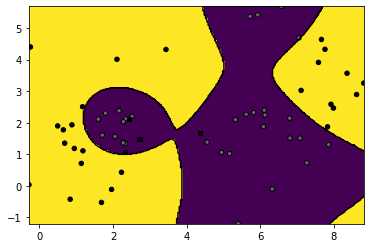

Accuracy:  0.9333333333333333  Recall:  0.8666666666666667 Precision:  1.0


C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


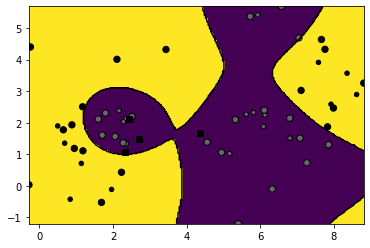

Accuracy:  0.9333333333333333  Recall:  0.8666666666666667 Precision:  1.0


In [28]:
import ksvm_wrap

np.random.seed(100)
X, Y_ = data.sample_gmm_2d(6,2,10)
model = ksvm_wrap.KSVMWrap(X,Y_)

probs = model.predict(X)
rect = (np.min(X, axis=0), np.max(X, axis=0))
special=model.support_indices()
data.graph_surface(lambda X: model.predict(X), rect)
data.graph_data(X, Y_, probs, special)
plt.show()

accuracy, recall, precision = model.get_scores(X, Y_)
print("Accuracy: ", accuracy, " Recall: ", recall, "Precision: ", precision)

# 7. Studija slučaja: MNIST (20% bodova)

In [29]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda')

dataset_root = 'C:/Users/Filip/Documents/MNIST'  # change this to your preference
mnist_train = torchvision.datasets.MNIST(dataset_root, train=True, download=True)
mnist_test = torchvision.datasets.MNIST(dataset_root, train=False, download=True)

x_train, y_train = mnist_train.data, mnist_train.targets
x_test, y_test = mnist_test.data, mnist_test.targets
x_train, x_test = x_train.float().div_(255.0), x_test.float().div_(255.0)

N = x_train.shape[0]
D = x_train.shape[1] * x_train.shape[2]
C = y_train.max().add_(1).item()

print("N =",N,"D =", D,"C =", C)

N = 60000 D = 784 C = 10


Za model konfiguracije [784, 10] iscrtajte i komentirajte naučene matrice težina za svaku pojedinu znamenku. Ponovite za različite iznose regularizacije.

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce GTX 1080
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [31]:
X_train, X_test = x_train.view(-1, 784).to(device), x_test.view(-1, 784).to(device)

def activation(X):
    return torch.relu(X)

parameter_list = [D, C]
model = pt_deep.PTDeep(parameter_list, activation).to(device)

model.train(X_train, y_train, 3000, 0.5)

iter:  0  loss:  16.900145131306505
iter:  100  loss:  1.446874487119335
iter:  200  loss:  1.002657923044083
iter:  300  loss:  0.8380454124103256
iter:  400  loss:  0.7458395846592769
iter:  500  loss:  0.6842498341350028
iter:  600  loss:  0.6391827480624821
iter:  700  loss:  0.604332359360774
iter:  800  loss:  0.5763490522469368
iter:  900  loss:  0.5532503339922342
iter:  1000  loss:  0.5337676845105264
iter:  1100  loss:  0.5170442271021239
iter:  1200  loss:  0.5024796239004208
iter:  1300  loss:  0.48964133704095003
iter:  1400  loss:  0.4782092055258306
iter:  1500  loss:  0.4679400244026931
iter:  1600  loss:  0.4586450607663591
iter:  1700  loss:  0.450175421630852
iter:  1800  loss:  0.4424120846116199
iter:  1900  loss:  0.4352588163537256
iter:  2000  loss:  0.42863698389168753
iter:  2100  loss:  0.42248167976702894
iter:  2200  loss:  0.4167388004765078
iter:  2300  loss:  0.41136283144261243
iter:  2400  loss:  0.40631515701982385
iter:  2500  loss:  0.40156275929476

Accuracy:  0.9022333333333333
Precision & recall for class 0 :  (0.9535708255951376, 0.9473331096947333)
Precision & recall for class 1 :  (0.9626223672500741, 0.9467541940189642)
Precision & recall for class 2 :  (0.8784827123195703, 0.8911970032351438)
Precision & recall for class 3 :  (0.8775077475126407, 0.8813892529488859)
Precision & recall for class 4 :  (0.9111605614515577, 0.909137489325363)
Precision & recall for class 5 :  (0.8444936358605424, 0.8515625)
Precision & recall for class 6 :  (0.9420412301453194, 0.9305625104323152)
Precision & recall for class 7 :  (0.9133280127693536, 0.9220109571382533)
Precision & recall for class 8 :  (0.8489147154332592, 0.8614290669441554)
Precision & recall for class 9 :  (0.8769541099344428, 0.8677644710578842)


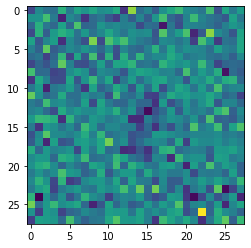

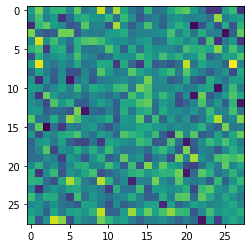

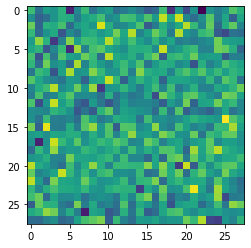

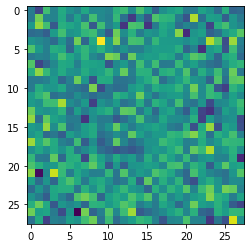

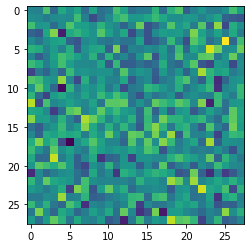

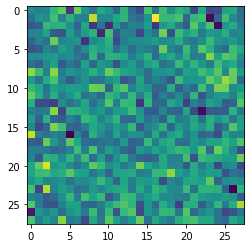

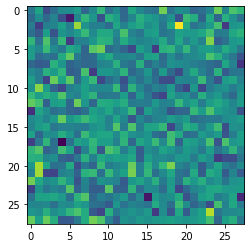

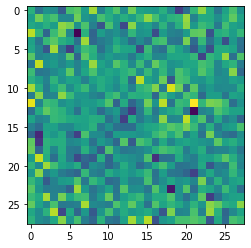

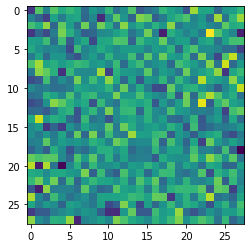

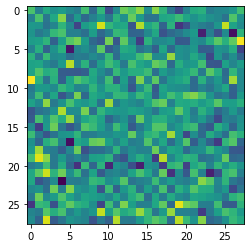

In [32]:
from matplotlib import image

Y = model.evaluate(X_train)

accuracy, pr, M = data.eval_perf_multi(Y, y_train)
print("Accuracy: ", accuracy)
for i in range(10):
    print("Precision & recall for class", i, ": ", pr[i])
    
for i in range(10):
    weight_image = model.W[0].detach().cpu().numpy().T.reshape(-1, 28, 28)
    plt.imshow(weight_image[i], interpolation='nearest')
    plt.show()

Naučite duboke modele s konfiguracijama [784, 10], [784, 100, 10], [784, 100, 100, 10] i [784, 100, 100, 100, 10]. Ako nemate funkcionalan GPU ne morate provoditi eksperimente s posljednje dvije konfiguracije. Nakon svake epohe učenja pohranite gubitak. Obratite pažnju na to da će dublji modeli bolje konvergirati s više iteracija s manjim korakom. Usporedite modele s obzirom na kretanje gubitka kroz epohe te pokazatelje performanse (točnost, preciznost, odziv) na skupovima za učenje i testiranje. Za najuspješniji model iscrtajte podatke koji najviše doprinose funkciji gubitka.

iter:  0  loss:  17.5503405667364
iter:  100  loss:  1.3815161527669437
iter:  200  loss:  0.987215350790943
iter:  300  loss:  0.8314732759839717
iter:  400  loss:  0.741146767167571
iter:  500  loss:  0.6803995421496926
iter:  600  loss:  0.6360171704205932
iter:  700  loss:  0.6017879704764045
iter:  800  loss:  0.574363583824668
iter:  900  loss:  0.5517612714705303
iter:  1000  loss:  0.5327178610163591
iter:  1100  loss:  0.5163813195242861
iter:  1200  loss:  0.502152270010368
iter:  1300  loss:  0.489596667158032
iter:  1400  loss:  0.4783935698829989
iter:  1500  loss:  0.46830136156075436
iter:  1600  loss:  0.4591350899342557
iter:  1700  loss:  0.450750982955311
iter:  1800  loss:  0.4430356474620817
iter:  1900  loss:  0.4358984081327411
iter:  2000  loss:  0.429265807643551
iter:  2100  loss:  0.4230776101332014
iter:  2200  loss:  0.4172838578279698
iter:  2300  loss:  0.41184267429888655
iter:  2400  loss:  0.4067186055568442
iter:  2500  loss:  0.40188135482433623
iter

KeyboardInterrupt: 

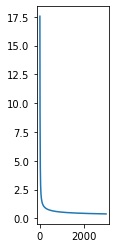

In [33]:
configs = [[784, 10],[784, 100, 10], [784, 100, 100, 10], [784,100,100,100,10]]
i = 1
for config in configs:
    model = pt_deep.PTDeep(config, activation).to(device)
    loss_history = model.train(X_train, y_train, 3000, 0.5, record_loss=True)
    plt.plot(loss_history)
plt.show()

Proučite utjecaj regularizacije na performansu dubokih modela na skupovima za učenje i testiranje.

Slučajno izdvojite 1/5 podataka iz skupa za učenje u skup za validaciju. Tijekom treniranja evaluirajte validacijsku performansu nakon završetka petlje po grupama podataka te na kraju vratite model s najboljom validacijskom performansom (engl. early stopping). Procijenite postignuti utjecaj na konačnu vrijednost funkcije cilja i generalizacijsku performansu.

Implementirajte stohastički gradijentni spust odnosno postupak učenja po mini-grupama. Prije svake epohe izmiješajte podatke, zatim ih podijelite u n grupa (engl. mini-batch) i onda provedite korak učenja za svaku grupu posebno. Pripazite na to da gubitak karakterizirate tako da ne ovisi o veličini grupe jer je tako lakše interpretirati iznos gubitka te validirati korak učenja. Vaš kod pohranite u metodi train_mb. Procijenite utjecaj na kvalitetu konvergencije i postignutu performansu za najuspješniju konfiguraciju iz prethodnog zadatka. Napomena: u svrhu razumijevanja postupka učenja po mini-grupama, u ovoj vježbi nije dozvoljeno korištenje razreda torch.utils.data.DataLoader.

Promijenite optimizator u torch.optim.Adam s fiksnim korakom učenja 1e-4. procijenite utjecaj te promjene na kvalitetu konvergencije i postignutu performansu.

Isprobajte ADAM s varijabilnim korakom učenja. U izvedbi se pomognite funkcijom torch.optim.lr_scheduler.ExponentialLR, koju valja pozvati nakon svake epohe kao što je preporučeno u dokumentaciji). Neka početni korak učenja bude isti kao i ranije, a ostale parametre postavite na gamma=1-1e-4.

Izračunajte i interpretirajte gubitak slučajno incijaliziranog modela (dakle, modela koji nije vidio podatke za učenje).

In [34]:
config = [784, 100, 10]
model = pt_deep.PTDeep(config, activation)
print(model.get_loss(X_train, torch.tensor(data.class_to_onehot(y_train), dtype=torch.float64, device=device)).item())

83.41264086254759


Naučite linearni i jezgreni SVM uz pomoć modula sklearn.svm. Koristite podrazumijevano one vs one proširenje SVM-a za klasificiranje podataka u više razreda. Pri eksperimentiranju budite strpljivi jer bi učenje i evaluacija mogli trajati više od pola sata. Usporedite dobivenu performansu s performansom dubokih modela.

In [38]:
import sklearn

linear_svm = sklearn.svm.SVC(kernel='linear')
linear_svm.fit(X_train.detach().cpu().numpy(), y_train.detach().cpu().numpy())

rbf_svm = sklearn.svm.SVC(kernel='rbf')
rbf_svm.fit(X_train.detach().cpu().numpy(), y_train.detach().cpu().numpy())    

SVC()

In [40]:
Y = linear_svm.predict(X_train.detach().cpu().numpy())
accuracy, pr, M = data.eval_perf_multi(Y, y_train.detach().cpu().numpy())
print("Linear SVM:")
print("Accuracy: ", accuracy)
for i in range(10):
    print("Precision & recall for class", i, ": ", pr[i])

Y = rbf_svm.predict(X_train.detach().cpu().numpy())
accuracy, pr, M = data.eval_perf_multi(Y, y_train.detach().cpu().numpy())
print("RBF SVM:")
print("Accuracy: ", accuracy)
for i in range(10):
    print("Precision & recall for class", i, ": ", pr[i])

Linear SVM:
Accuracy:  0.9707333333333333
Precision & recall for class 0 :  (0.996285666047611, 0.9859649122807017)
Precision & recall for class 1 :  (0.9949569860575497, 0.9832893579595426)
Precision & recall for class 2 :  (0.9699563611950319, 0.9631666666666666)
Precision & recall for class 3 :  (0.956124612624368, 0.957217504898759)
Precision & recall for class 4 :  (0.9779185210544334, 0.9665031297580782)
Precision & recall for class 5 :  (0.9501936912008855, 0.959039285049339)
Precision & recall for class 6 :  (0.9903683676917878, 0.9878644867689196)
Precision & recall for class 7 :  (0.9717478052673584, 0.9745477829358092)
Precision & recall for class 8 :  (0.9478721586053666, 0.9662020905923345)
Precision & recall for class 9 :  (0.9472180198352664, 0.9604567922277143)
RBF SVM:
Accuracy:  0.9899166666666667
Precision & recall for class 0 :  (0.9964544994090833, 0.9941047667171973)
Precision & recall for class 1 :  (0.9945120142390982, 0.9908378897591251)
Precision & recall for 